<a href="https://colab.research.google.com/github/mariapaulasedano15/mpss0315/blob/main/03_An%C3%A1lisis_primario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/AlejandroMesa2/Costa-Rican-Household-Poverty-Level-Prediction/main/Datasets/CostaRicanHouseholdPovertyLevel_cleaned.csv'
df = pd.read_csv(url)
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4t1,r4t2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,ID_279628684,190000.0,0,3,0,1,1,0.0,0,1,...,1,0,0,0,0,0,1,0,43,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,0,1,...,1,0,0,0,0,0,1,0,67,4.0
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,0,1,...,1,0,0,0,0,0,1,0,92,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1.0,1,3,...,1,0,0,0,0,0,1,0,17,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1.0,1,3,...,1,0,0,0,0,0,1,0,37,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,0.0,1,2,1,1,1,0.0,1,5,...,0,0,0,0,0,1,0,1,10,NaN
33409,ID_1a7c6953b,0.0,0,3,0,1,1,0.0,0,4,...,0,0,0,0,0,1,0,1,54,NaN
33410,ID_07dbb4be2,0.0,0,3,0,1,1,0.0,0,4,...,0,0,0,0,0,1,0,1,12,NaN
33411,ID_34d2ed046,0.0,0,3,0,1,1,0.0,0,4,...,0,0,0,0,0,1,0,1,12,NaN


Relacionar el tipo de vivienda con el target

In [ ]:
col = [i for i in df.columns if i.startswith('tipovivi')]
df['temp_tipovivi'] = df[col].idxmax(axis = 1)
df.pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_tipovivi', aggfunc= 'count', margins= True)


temp_tipovivi,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,All
Target,,,,,,
1.0,471,26,127,38,93,755
2.0,987,50,287,62,211,1597
3.0,772,75,225,22,115,1209
4.0,3681,810,1097,41,367,5996
All,5911,961,1736,163,786,9557


<Axes: ylabel='Target'>

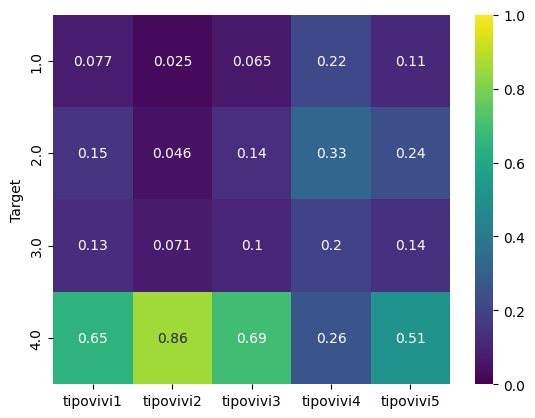

In [ ]:
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_tipovivi', aggfunc= 'count')
cat = df['temp_tipovivi'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_tipovivi'],inplace=True)

\# de tablets

<Axes: xlabel='v18q1', ylabel='Target'>

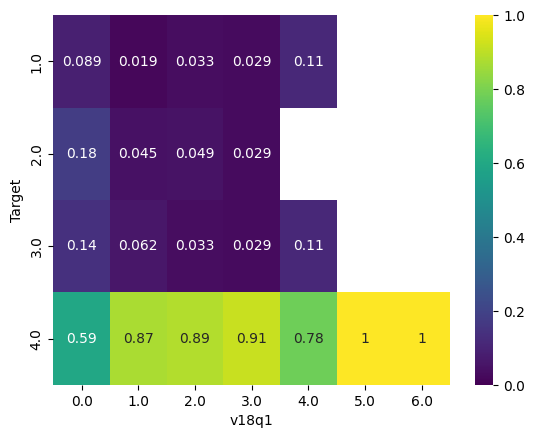

In [ ]:
temp = df[(df['parentesco1'] == 1)&(df['Target'].notnull())].pivot_table(index = 'Target', columns = 'v18q1', values = 'idhogar', aggfunc='count')
cat = df['v18q1'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

Pared

<Axes: ylabel='Target'>

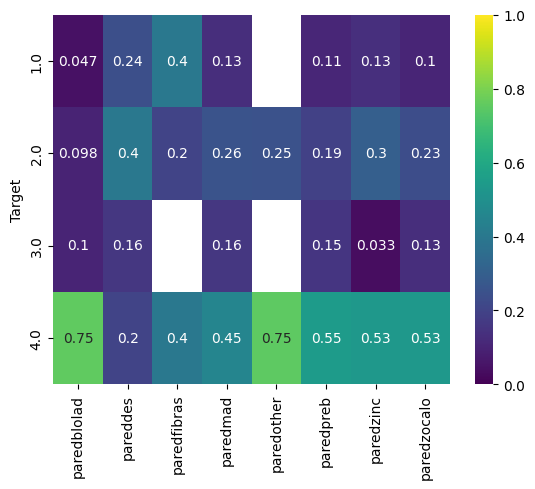

In [ ]:
col = [i for i in df.columns if i.startswith('pared')]
df['temp_pared'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_pared', aggfunc= 'count')
cat = df['temp_pared'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_pared'],inplace=True)

Piso

<Axes: ylabel='Target'>

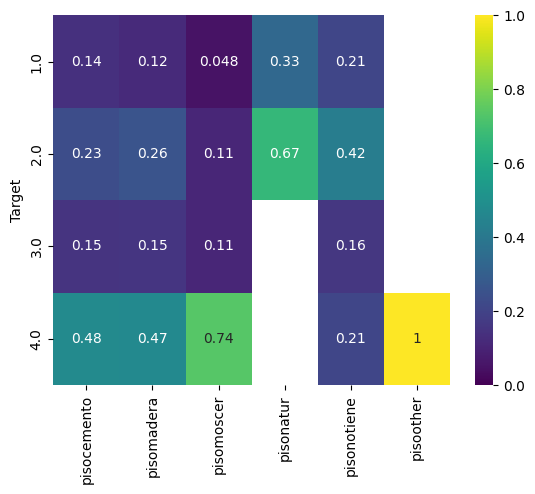

In [ ]:
col = [i for i in df.columns if i.startswith('piso')]
df['temp_piso'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_piso', aggfunc= 'count')
cat = df['temp_piso'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_piso'],inplace = True)

Techo

<Axes: ylabel='Target'>

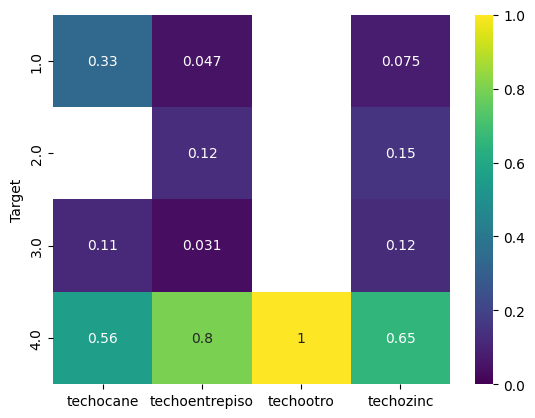

In [ ]:
col = [i for i in df.columns if i.startswith('techo')]
df['temp_techo'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_techo', aggfunc= 'count')
cat = df['temp_techo'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_techo'],inplace = True)

Abastecimiento de agua

<Axes: xlabel='temp_abastagua', ylabel='Target'>

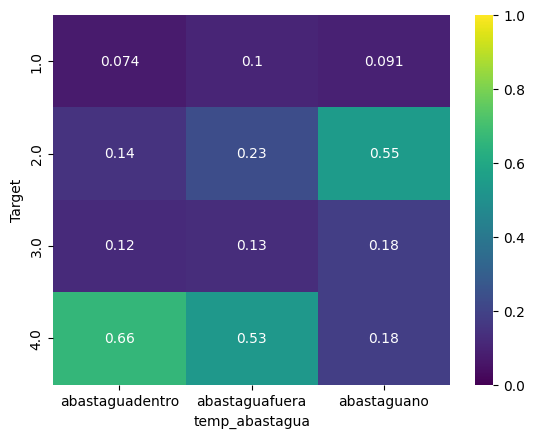

In [ ]:
col = [i for i in df.columns if i.startswith('abastagua')]
df['temp_abastagua'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_abastagua', aggfunc= 'count')
cat = df['temp_abastagua'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_abastagua'],inplace = True)

Electricidad

<Axes: ylabel='Target'>

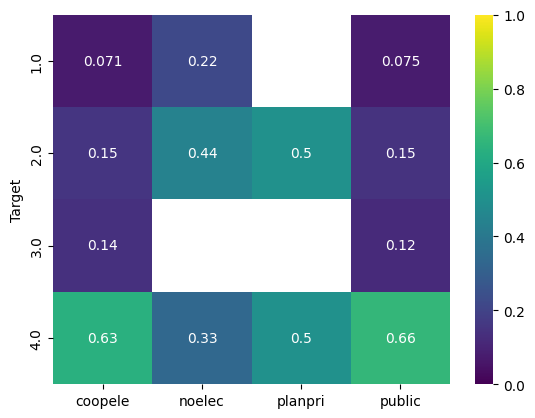

In [ ]:
df['temp_electricity'] = df[['public', 'planpri', 'noelec', 'coopele']].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_electricity', aggfunc= 'count')
cat = df['temp_electricity'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_electricity'],inplace = True)

Sanitario

<Axes: ylabel='Target'>

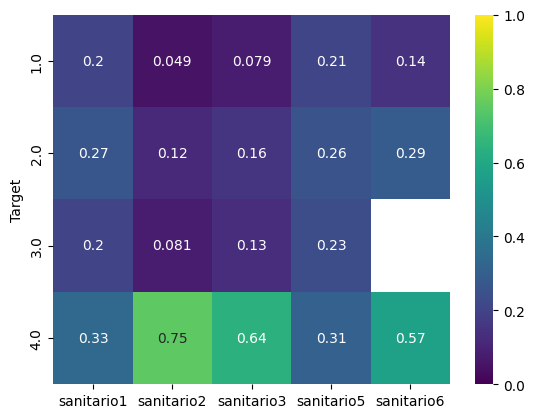

In [ ]:
col = [i for i in df.columns if i.startswith('sanit')]
df['temp_sanitario'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_sanitario', aggfunc= 'count')
cat = df['temp_sanitario'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_sanitario'],inplace = True)

Cocina

<Axes: ylabel='Target'>

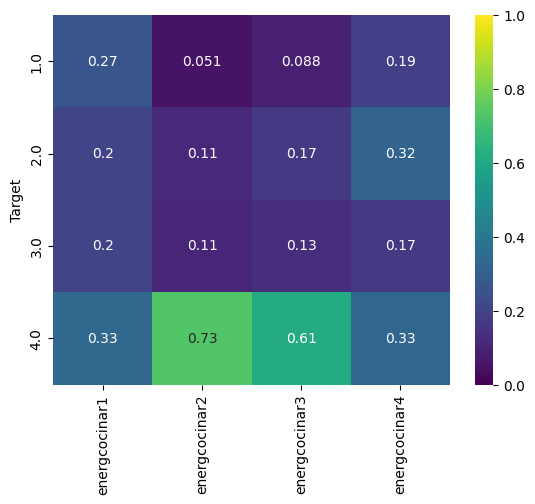

In [ ]:
col = [i for i in df.columns if i.startswith('energcocinar')]
df['temp_energcocinar'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_energcocinar', aggfunc= 'count')
cat = df['temp_energcocinar'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_energcocinar'],inplace = True)

Basura

<Axes: ylabel='Target'>

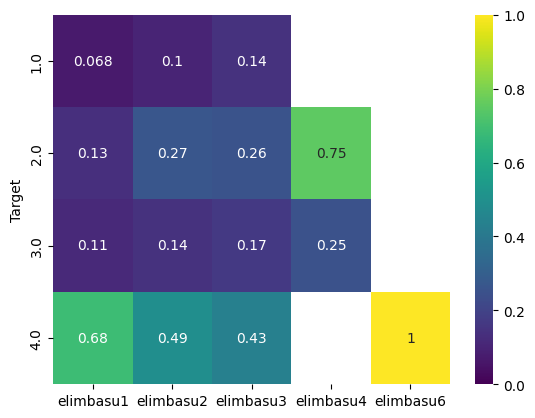

In [ ]:
col = [i for i in df.columns if i.startswith('elimbasu')]
df['temp_elimbasu'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_elimbasu', aggfunc= 'count')
cat = df['temp_elimbasu'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

Estado de la vivienda
Las 3 variables 'eviv', 'etecho' y 'epared' tienen una correlación grande entre sí, por lo que se juntan en una sola clasificación del mismo tipo llamada 'ecasa'

In [ ]:
puntos = [int((df['eviv1'][i]+df['etecho1'][i]+df['epared1'][i])+(df['eviv2'][i]+df['etecho2'][i]+df['epared2'][i])*2+(df['eviv3'][i]+df['etecho3'][i]+df['epared3'][i])*3)/3 for i in range(len(df))]
df['ecasa1'] = [1 if puntos[i]==1 else 0 for i in range(len(puntos))]
df['ecasa2'] = [1 if puntos[i]==2 else 0 for i in range(len(puntos))]
df['ecasa3'] = [1 if puntos[i]==3 else 0 for i in range(len(puntos))]

0        0
1        1
2        0
3        0
4        0
        ..
33408    0
33409    0
33410    0
33411    0
33412    0
Name: ecasa2, Length: 33413, dtype: int64

<Axes: ylabel='Target'>

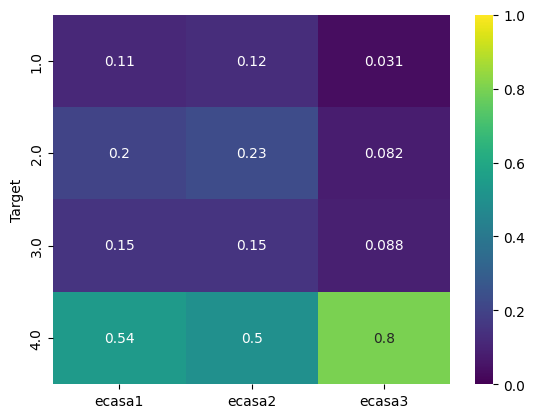

In [ ]:
col = [i for i in df.columns if i.startswith('ecasa')]
df['temp_ecasa'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_ecasa', aggfunc= 'count')
cat = df['temp_ecasa'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)


In [ ]:
df.drop(columns=['temp_ecasa','eviv1','eviv2','eviv3','etecho1','etecho2','etecho3','epared1','epared2','epared3'],inplace = True)

Estado civil

<Axes: ylabel='Target'>

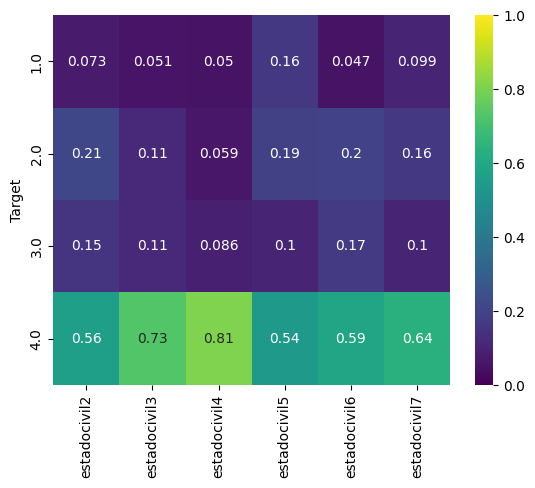

In [ ]:
col = [i for i in df.columns if i.startswith('estadocivil')]
df['temp_estadocivil'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_estadocivil', aggfunc= 'count')
cat = df['temp_estadocivil'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_estadocivil'],inplace = True)

Nivel educativo

<Axes: ylabel='Target'>

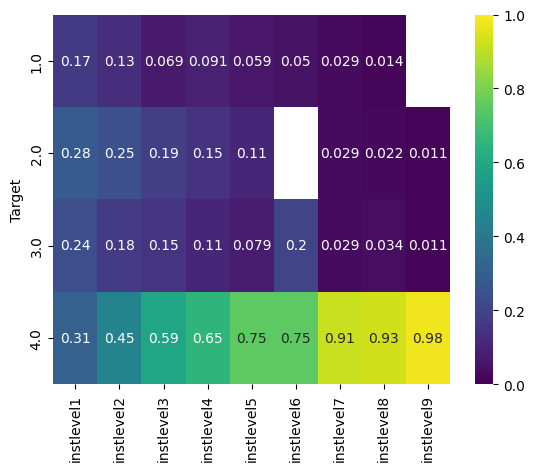

In [ ]:
col = [i for i in df.columns if i.startswith('instlevel')]
df['temp_instlevel'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_instlevel', aggfunc= 'count')
cat = df['temp_instlevel'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/(cat.T), vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_instlevel'],inplace = True)

Región

<Axes: ylabel='Target'>

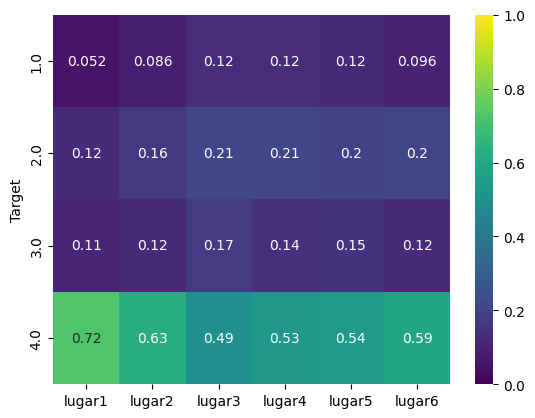

In [ ]:
col = [i for i in df.columns if i.startswith('lugar')]
df['temp_lugar'] = df[col].idxmax(axis = 1)
temp = df[df['parentesco1'] == 1 ].pivot_table(values = 'idhogar' , index = 'Target', columns = 'temp_lugar', aggfunc= 'count')
cat = df['temp_lugar'][(df['Target'].notnull())&(df['parentesco1'] == 1)].value_counts()
sns.heatmap(temp/cat.T, vmin= 0, vmax= 1, cmap = 'viridis', annot= True)

In [ ]:
df.drop(columns=['temp_lugar'],inplace = True)

In [ ]:
df.to_csv('CostaRicanHouseholdPovertyLevel_analized.csv', index=False)